## Seun Holiness Oloruntoba

### Ensemble Project to:

### "predict which customer is more likely to purchase a newly introduced travel package" 

### Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

Objective

#### To predict which customer is more likely to purchase the newly introduced travel package.

Data Dictionary

Customer details:

CustomerID: Unique customer ID
ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
Age: Age of customer
TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
Occupation: Occupation of customer
Gender: Gender of customer
NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
PreferredPropertyStar: Preferred hotel property rating by customer
MaritalStatus: Marital status of customer
NumberOfTrips: Average number of trips in a year by customer
Passport: The customer has a passport or not (0: No, 1: Yes)
OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
Designation: Designation of the customer in the current organization
MonthlyIncome: Gross monthly income of the customer
Customer interaction data: 

PitchSatisfactionScore: Sales pitch satisfaction score
ProductPitched: Product pitched by the salesperson
NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [100]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [101]:
#Import data from excel sheet 'Tourism'file(Sheet_2)
Travel = pd.read_excel('Tourism.xlsx',index_col=0, sheet_name='Tourism')

In [102]:
# copy data to another varaible to avoid any change to original data
Travel_data = Travel.copy()

In [103]:
#View the first 5 Observation of the dataset
Travel_data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [104]:
#View the last 5 Observations of the dataset
Travel_data.tail()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
CustomerID,,,,,,,,,,,,,,,,,,,
204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [105]:
#Understand the shape of the data
Travel_data.shape

(4888, 19)

### Observation
There are 4888 Observations and 19 columns(features)in the data

In [106]:
#Check the data types of the columns
Travel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  P

### Observation
There are Objects, Floats and Integers data types; The Objects would be converted to category to save some space and also makes it easy to model, some float would be converted to integer, while some integer would be converted to category.

Each of the data would be reviewed and converted for approriateness of the best data type that would help the modelling and also communicate appropriately the intent of Observation. 

In [107]:
#Check for null values 
Travel_data.isna().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

### Observation
The following features has null values : Age - 226, Typeof Contract - 25, Durationof Pitch - 251, Numberoffollowups - 45, PreferredPropertyStar - 26, NumberofTrips - 140, Numberof ChildrenVisiting - 66, Monthly income - 233. These null values would be reviewed to determine if they should be removed or replaced with mean, median, mode or otherwise. 

In [108]:
#Change all the Objects to Categorical variable
cols = Travel_data.select_dtypes(['object'])
cols.columns
for i in cols.columns:
    Travel_data[i] = Travel_data[i].astype('category')

In [109]:
#Confirm the data types after conversion
Travel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   int64   
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   int64   
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null  

### Observation:
All the Object data types have been converted to category and the memory size has reduced from 763KB to 564KB 

In [110]:
# Making a list of all categorical variables to understand what to replace with in respect to any wrong category
Travel_col = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]

# Printing number of count of each unique value in each column
for column in Travel_col:
    print(Travel_data[column].value_counts())
    print("-" * 40)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
----------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
----------------------------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
----------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
----------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
----------------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
----------------------------------------


### Observation: 
Female has another category Fe Male, there is every probability that this was a mistake which occured during entry, this would be replaced with Female and added to the Female category.

In [111]:
#Replace Fe Male with Female
Travel_data['Gender'] = Travel_data['Gender'].str.replace('Fe Male','Female')

In [112]:
#Confirm the replacement has been done
# Making a list of all categorical variables to understand what to replace with in respect to the missing numbers
Travel_col = [
    "TypeofContact",
    "Occupation",
    "Gender",
    "ProductPitched",
    "MaritalStatus",
    "Designation",
]

# Printing number of count of each unique value in each column
for column in Travel_col:
    print(Travel_data[column].value_counts())
    print("-" * 40)

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
----------------------------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
----------------------------------------
Male      2916
Female    1972
Name: Gender, dtype: int64
----------------------------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
----------------------------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
----------------------------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
----------------------------------------


### Observation 
The Fe Male has been replaced with Female and added to it to reflect two categories instead of previous 3 categories 

## Understanding the data distribution before replacing the missing values

In [113]:
#Develop a function that takes the numerical column as the input and returns the boxplots and histograms for the variable.
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

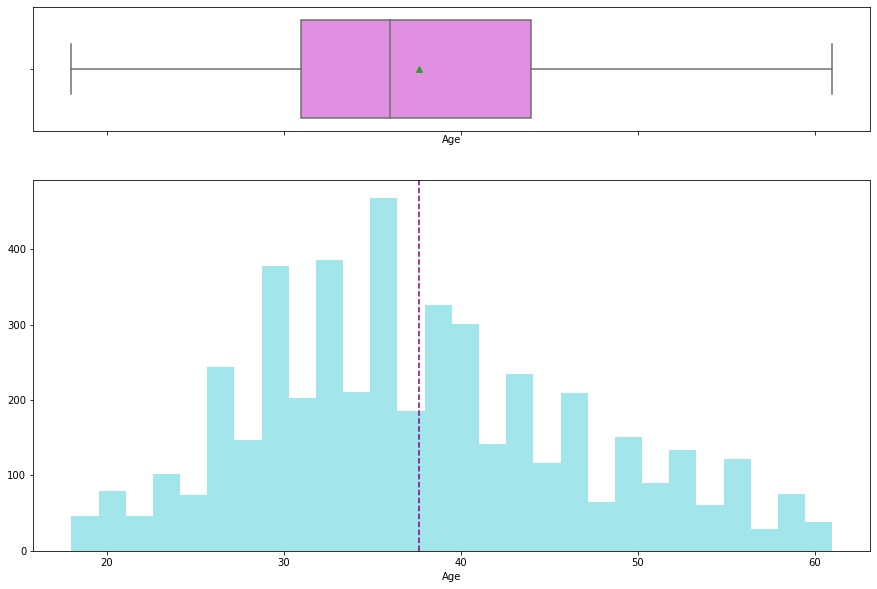

In [114]:
#Understanding data distribution for Age
#Numerical variable histogram and boxplot for Age
histogram_boxplot(Travel_data["Age"])

### Observation 
The data distribution is close to normal distribution and the mean and median are close, replacing the missing value with mean would be a better option than with median as that will help the data to be more evenly distributed and close to symetrical as well. 



In [115]:
# Replace the missing values in 'Age' column with the mean
Travel_data['Age'] = Travel_data['Age'].fillna(value =Travel_data['Age'].median())
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [116]:
#Drop the Missing numbers in TypeofContact since the percentage of the missing value is small compared to the overall data
Travel_data = Travel_data.dropna(subset = ['TypeofContact'])
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch             226
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
dtype: int64

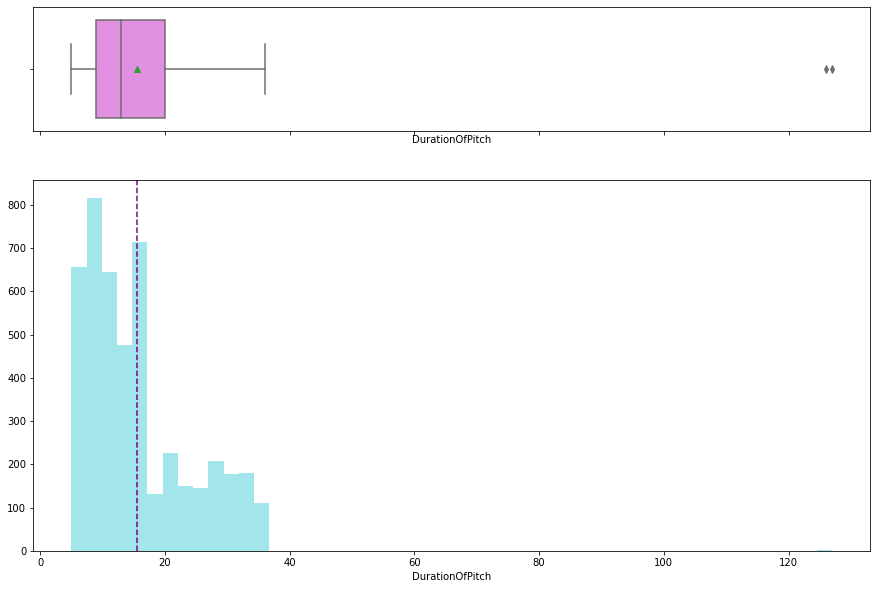

In [117]:
#Understanding data distribution for DurationofPitch
#Numerical variable histogram and boxplot for DurationofPitch
histogram_boxplot(Travel_data["DurationOfPitch"])

## Observation :
Based on the above histogram, which is rightly skewed, replacing with mean would be the best option compared to median or mode.
Also some outliers are identified from the boxplot, the outliers would be reviewed for appropriateness later, either to remove it or keep it

In [118]:
#Replacing DurationOfPitch with mean 
Travel_data['DurationOfPitch'] = Travel_data['DurationOfPitch'].fillna(value =Travel_data['DurationOfPitch'].median())
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
dtype: int64

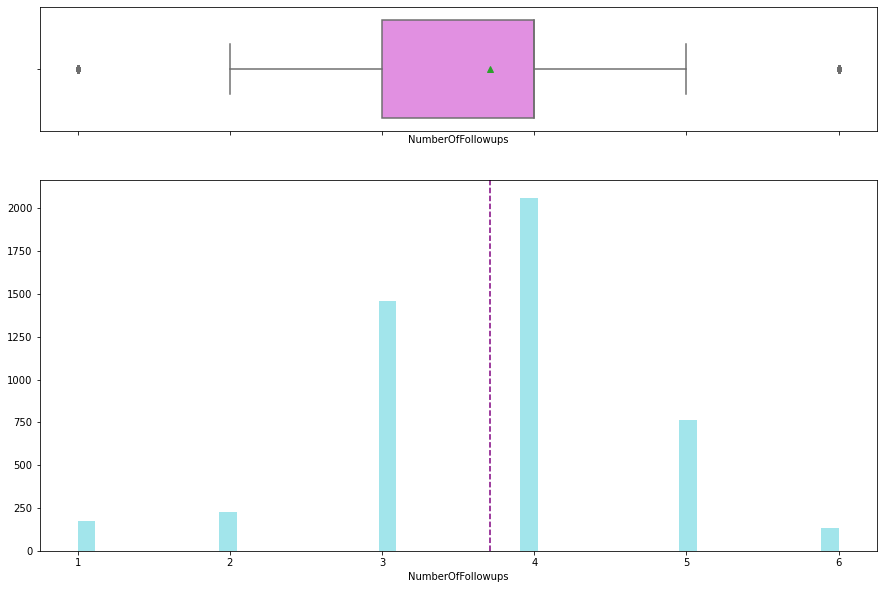

In [119]:
#Understanding data distribution for NumberOfFollowups
#Numerical variable histogram and boxplot for NumberOfFollowups
histogram_boxplot(Travel_data["NumberOfFollowups"])

## Observation: 
The graph looks close to normal but there are outliers both at the right and left side of the distribution. Replacing the missing value with mean would be a good plan since the distribution looks normal

In [120]:
#Replacing NumberOfFollowups with mean 
Travel_data['NumberOfFollowups'] = Travel_data['NumberOfFollowups'].fillna(value =Travel_data['NumberOfFollowups'].median())
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
dtype: int64

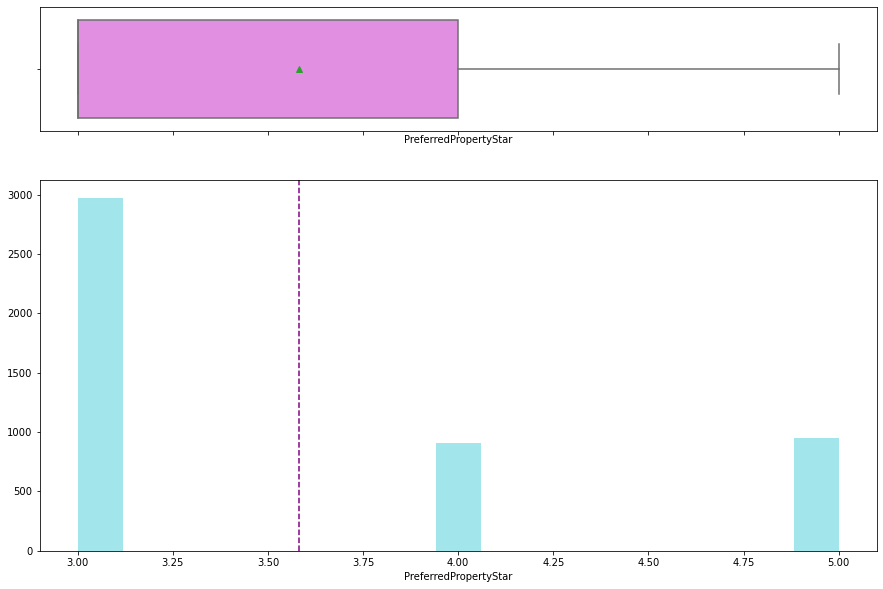

In [121]:
#Understanding data distribution for PreferredPropertyStars
#Numerical variable histogram and boxplot for PreferredPropertyStar
histogram_boxplot(Travel_data["PreferredPropertyStar"])

## Observation: 
Reviewing the data distribution, it is difficult to replace the missing values appropriately, no data is close to the mean or median and except we want to use the mode which accounts for over 60% of the data. It would be appropriate to drop the data or replace with mode, since the percentage is very small and cannot affect the data modelling significantly we could easily drop the observations with missing values 

In [122]:
#Drop the Missing numbers in PreferredPropertyStar since the percentage of the missing value is small compared to the overall data
Travel_data = Travel_data.dropna(subset = ['PreferredPropertyStar'])
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
dtype: int64

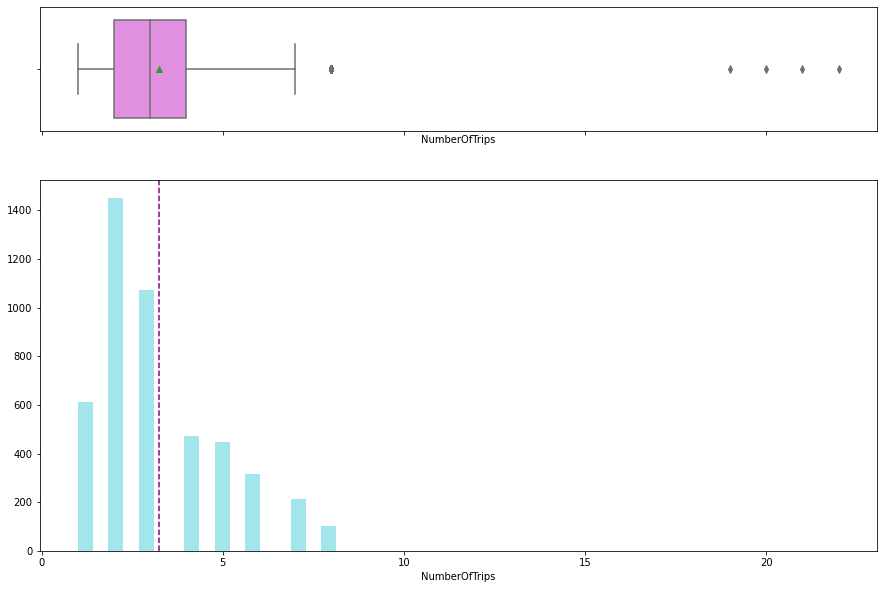

In [123]:
#Understanding data distribution for NumberOfTrips
#Numerical variable histogram and boxplot for NumberOfTrips
histogram_boxplot(Travel_data["NumberOfTrips"])

## Observation

The data distribution is rightly skewed with some outliers. Replacing with a mean would be a better option

In [124]:
Travel_data['NumberOfTrips'] = Travel_data['NumberOfTrips'].fillna(value =Travel_data['NumberOfTrips'].median())
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               208
dtype: int64

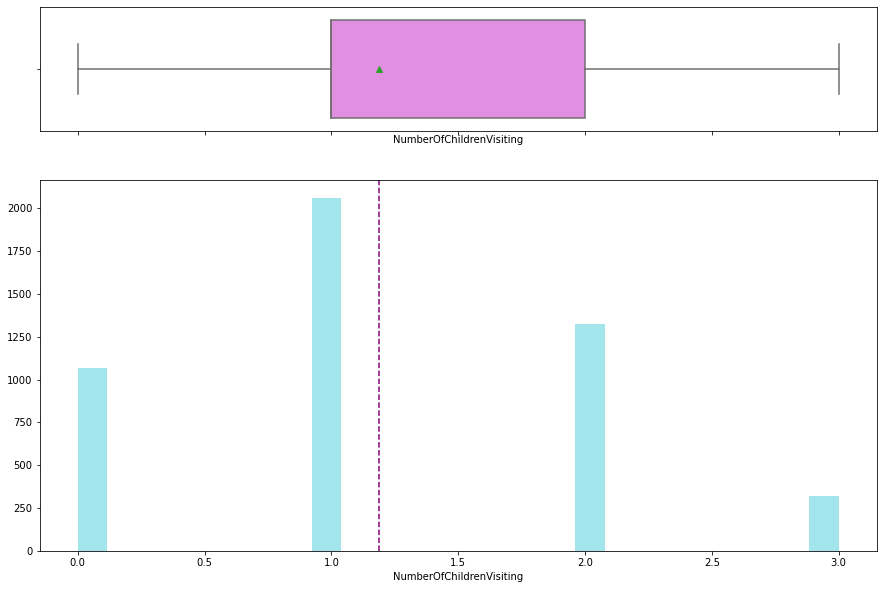

In [125]:
#Understanding data distribution for NumberOfChildrenVisiting
#Numerical variable histogram and boxplot for NumberOfChildrenVisiting
histogram_boxplot(Travel_data["NumberOfChildrenVisiting"])

## Observation:
The data looks normal with no outliers, replacing with a mean would be the best option. 

In [126]:
Travel_data['NumberOfChildrenVisiting'] = Travel_data['NumberOfChildrenVisiting'].fillna(value =Travel_data['NumberOfChildrenVisiting'].mean())
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               208
dtype: int64

## Observation: 
Mean and median are close and the distribution looks close to normal but with the mean looks lower, replacing with mean will make it looks more like normal 

In [127]:
Travel_data['NumberOfChildrenVisiting'] = Travel_data['NumberOfChildrenVisiting'].fillna(value =Travel_data['NumberOfChildrenVisiting'].mean())
Travel_data.isnull().sum()

ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               208
dtype: int64

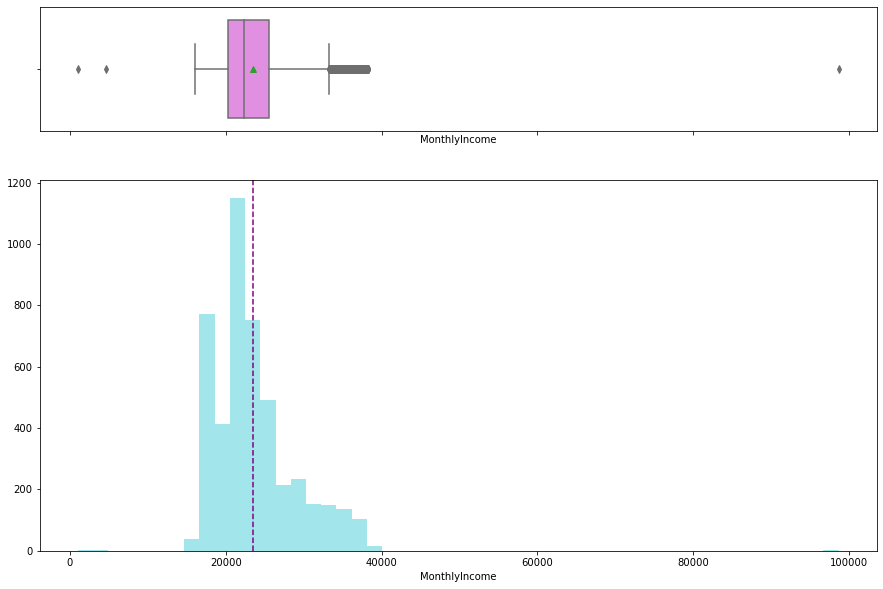

In [128]:
#Understanding data distribution for MonthlyIncome
#Numerical variable histogram and boxplot for MonthlyIncome
histogram_boxplot(Travel_data["MonthlyIncome"])

## Observation
This do not absolutely looks like normal but was close to it with some outliers, replacing with a mean looks like the best option

In [129]:
Travel_data['MonthlyIncome'] = Travel_data['MonthlyIncome'].fillna(value =Travel_data['MonthlyIncome'].median())
Travel_data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## Observations: 
All missing values have been handled in the dataset and no missing value noticed. 

In [130]:
#Confirm the number of uniqueness of the features to determine those that should be categorical and those that should be integer  :
Travel_data.nunique()

ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         2
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       5
Designation                    5
MonthlyIncome               2459
dtype: int64

## Observation : 
Convert the following to Categorical Variable : ProdTaken,TypeofContact,CityTier,Occupation,Gender, 
PreferredPropertyStar,MaritalStatus,Passport,OwnCar,PitchSatisfactionscore,Designation; 

This decision was taken based on the domain knowledge of data and the number of categories

In [131]:
#Convert the following to Category
Travel_data["ProdTaken"] = Travel_data["ProdTaken"].astype('category')
Travel_data["TypeofContact"] = Travel_data["TypeofContact"].astype('category')
Travel_data["CityTier"] = Travel_data["CityTier"].astype('category')
Travel_data["Occupation"] = Travel_data["Occupation"].astype('category')
Travel_data["PreferredPropertyStar"] = Travel_data["PreferredPropertyStar"].astype('category')
Travel_data["MaritalStatus"] = Travel_data["MaritalStatus"].astype('category')
Travel_data["Passport"] = Travel_data["Passport"].astype('category')
Travel_data["PitchSatisfactionScore"] = Travel_data["PitchSatisfactionScore"].astype('category')
Travel_data["OwnCar"] = Travel_data["OwnCar"].astype('category')

In [132]:
#Convert the following from float to integer since they can only be integers: Age,NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting
Travel_data["Age"] = Travel_data["Age"].astype('int')
Travel_data["NumberOfFollowups"] = Travel_data["NumberOfFollowups"].astype('int')
Travel_data["NumberOfTrips"] = Travel_data["NumberOfTrips"].astype('int')
Travel_data["NumberOfChildrenVisiting"] = Travel_data["NumberOfChildrenVisiting"].astype('int')

In [133]:
#Confirm the datatypes of the data after conversion
Travel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4837 entries, 200000 to 204887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4837 non-null   category
 1   Age                       4837 non-null   int32   
 2   TypeofContact             4837 non-null   category
 3   CityTier                  4837 non-null   category
 4   DurationOfPitch           4837 non-null   float64 
 5   Occupation                4837 non-null   category
 6   Gender                    4837 non-null   object  
 7   NumberOfPersonVisiting    4837 non-null   int64   
 8   NumberOfFollowups         4837 non-null   int32   
 9   ProductPitched            4837 non-null   category
 10  PreferredPropertyStar     4837 non-null   category
 11  MaritalStatus             4837 non-null   category
 12  NumberOfTrips             4837 non-null   int32   
 13  Passport                  4837 non-null  

# Summary of the dataset

In [134]:
Travel_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4837.0,37.516229,9.069167,18.0,31.0,36.0,43.0,61.0
DurationOfPitch,4837.0,15.380401,8.336915,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4837.0,2.904900,0.724191,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4837.0,3.708910,0.994832,1.0,3.0,4.0,4.0,6.0
NumberOfTrips,4837.0,3.224933,1.820483,1.0,2.0,3.0,4.0,22.0
NumberOfChildrenVisiting,4837.0,1.183998,0.850758,0.0,1.0,1.0,2.0,3.0
MonthlyIncome,4837.0,23471.238991,5071.299404,1000.0,20470.0,22295.0,25374.0,98678.0


### Observation

. Age of the Enquiry Customers range from 18 to 61 years and the average age is 37 years 

. Duration of Pitch Mean is 15 with a maximum of 127, which means it has an outlier, since the maximum is far greater than the mean and the median.

. Number of follow ups , Number of Person Visiting , Number of Children Visiting looks closely normal 

. Monthly income standard deviation is very high and the maximum number shows there are outliers 


# Univariate Analysis of Numerical features 

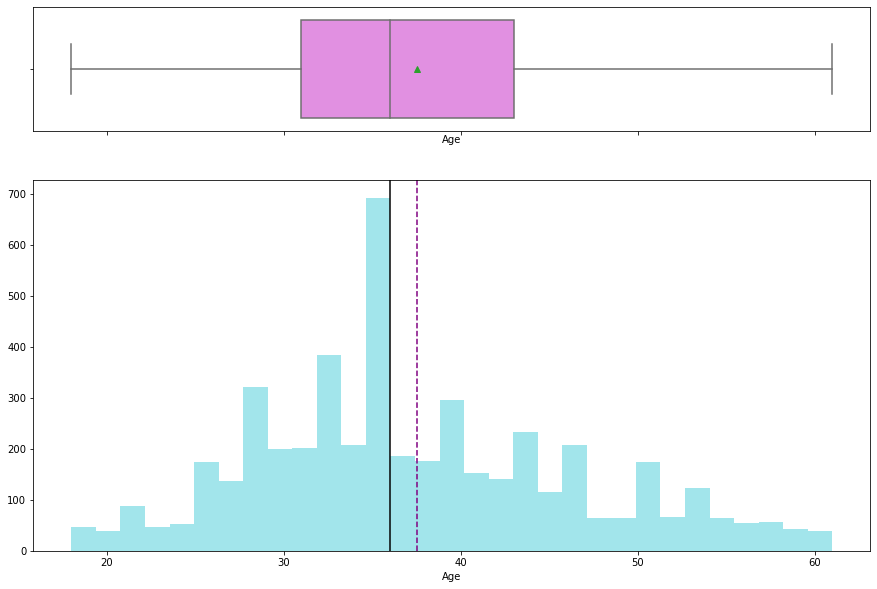

In [135]:
#Numerical variable histogram and boxplot for Age
histogram_boxplot(Travel_data["Age"])

### Observation: 
The data distribution is close to normal.

The mean and median age of the customers are around 37-38 years. 

Age 30-40years constitute almost 50% of the customer base for the company 

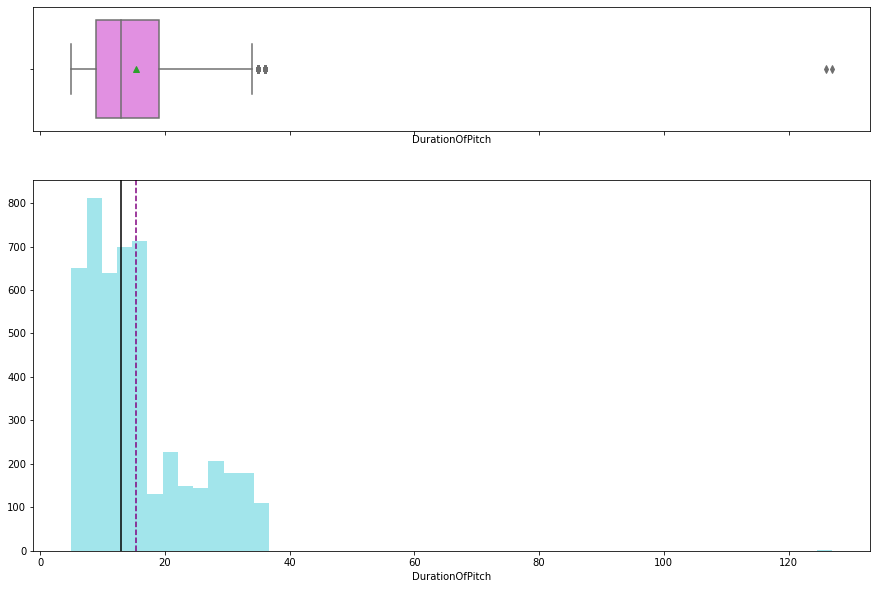

In [136]:
#Numerical variable histogram and boxplot for Duration of Pitch
histogram_boxplot(Travel_data["DurationOfPitch"])

### Observation: 
The average pitch duration data is rightly skewed 

The mean and the median are close 

There are outliers in the data

Noticed the pitch duration time reduces immediately after the mean, this need to be investigated further

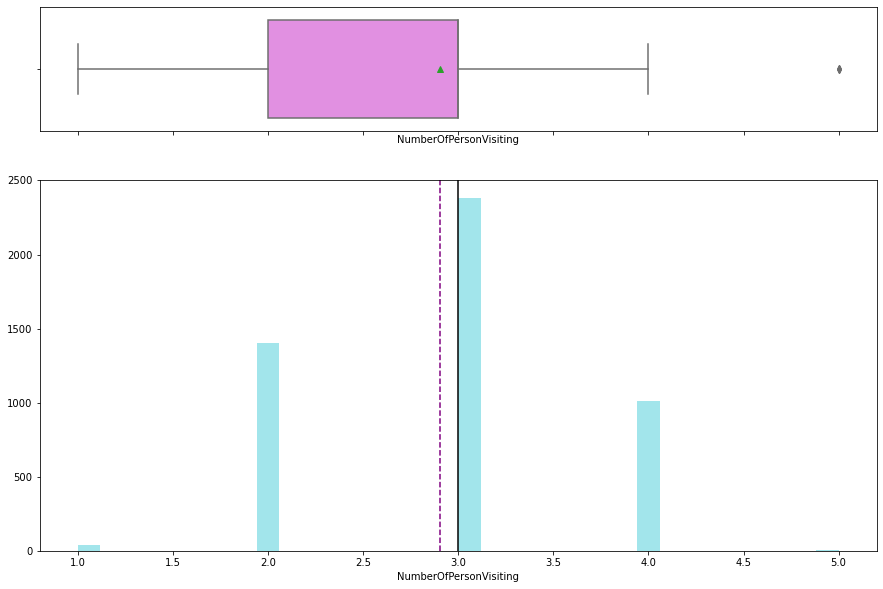

In [137]:
#Numerical variable histogram and boxplot for Duration of Pitch
histogram_boxplot(Travel_data["NumberOfPersonVisiting"])

### Observation: 
The data looks close to normal

The median number of people visiting with the customer is 3, even though the mean is lesser the number of people would always be in integers in whcih 3 is the closest, we can assume the mean is 3

It has outliers at around 5

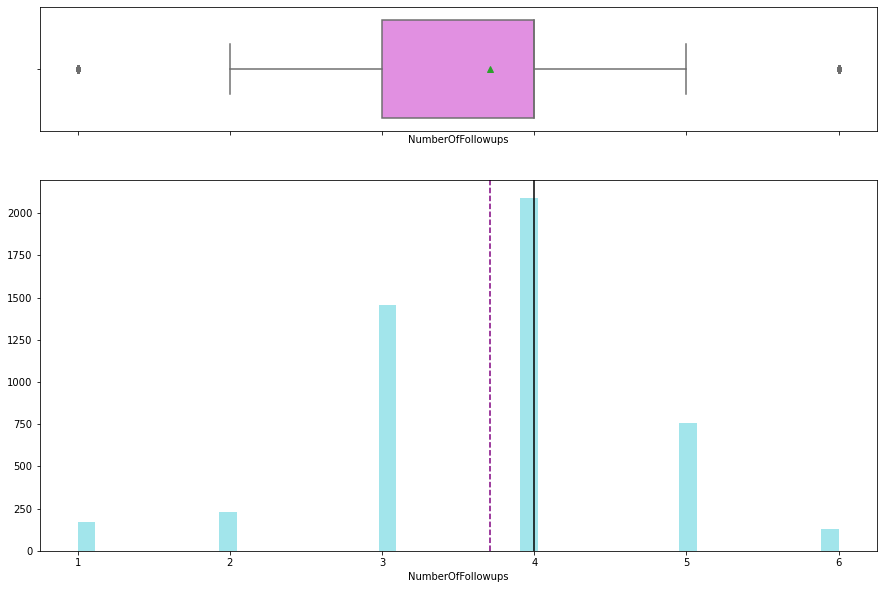

In [138]:
#Numerical variable histogram and boxplot of histogram_boxplot of NumberOfFollowups
histogram_boxplot(Travel_data["NumberOfFollowups"])

### Observation: 

The data distribution looks close to normal

The median number of the #numberoffollowups with the customers is around 4, even though the mean is lesser the number of people would always be in integers in which 4 is the closest, we can assume the mean is 4

There are outliers on both side of the boxplot

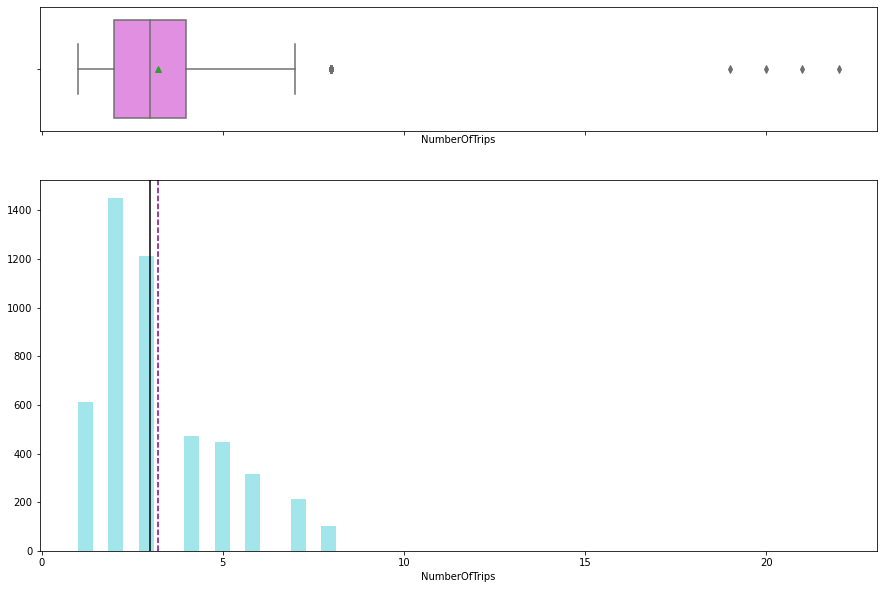

In [139]:
#Numerical variable histogram and boxplot for NumberOfTrips
histogram_boxplot(Travel_data["NumberOfTrips"])

### Observation: 
The mean and median are close which is approximately 3, since we cannot have number of trip that is not an integer

The data distribution is rightly skewed 

A larger percentage of the people had around 2-3 trips per year

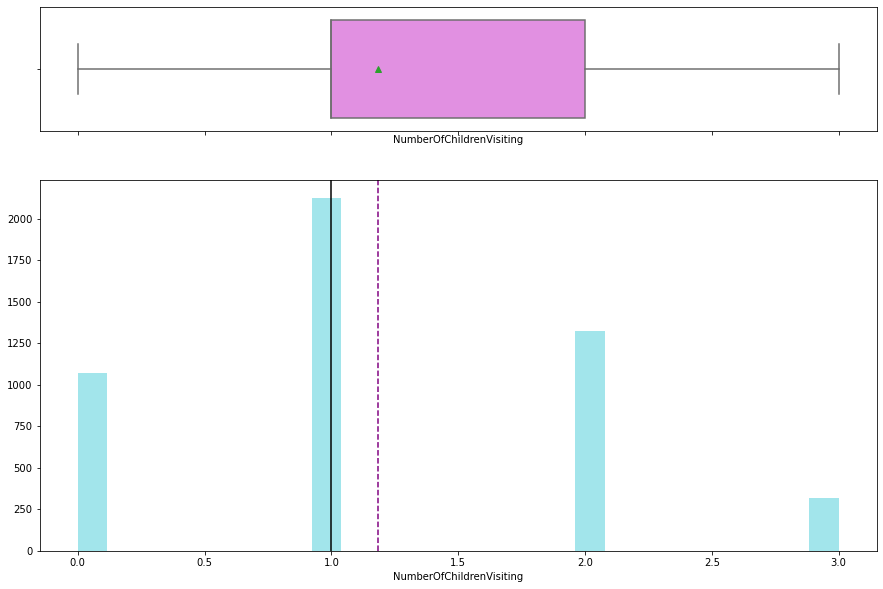

In [140]:
#Numerical variable histogram and boxplot for NumberOfChildrenVisiting
histogram_boxplot(Travel_data["NumberOfChildrenVisiting"])

### Observation:
The mean and median are around '1', which suggest the highest number of customers are those with '1' child 

The distribution looks a bit closer to normal 

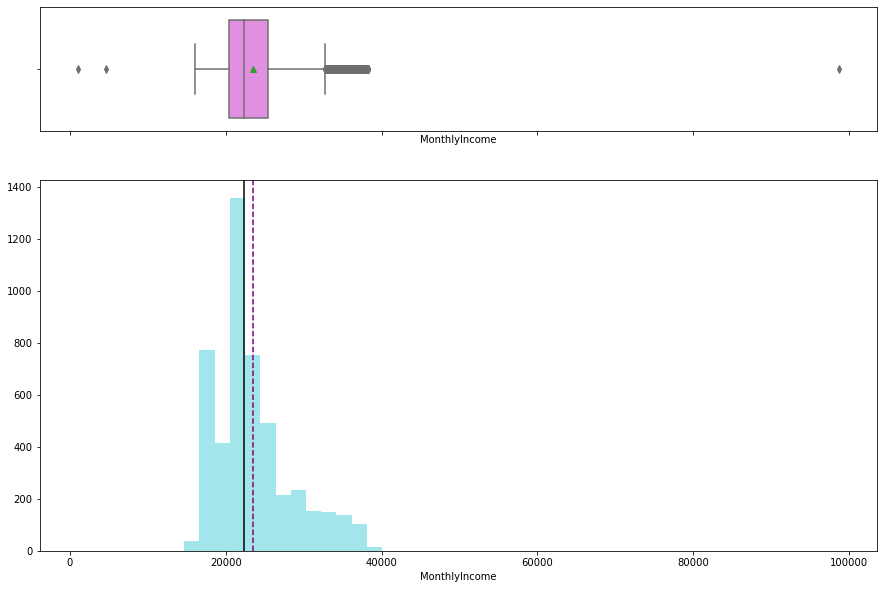

In [141]:
#Numerical variable histogram and boxplot for MonthlyIncome
histogram_boxplot(Travel_data["MonthlyIncome"])

### Observation:
The distribution of the Monthly Income is a bit between rightly skewed and normal

The mean and median are close to each other and most customers are between a salary scale of about 15,000 to 40,000 monthly salary

There are outliers in the monthly income. 

We may want to know the reason why the higher income earners are not patronising the vacation package

## Univariate Analysis of Categorical Features 

In [142]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

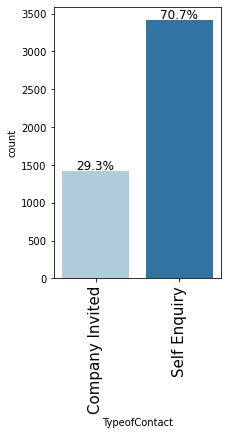

In [143]:
#Use the function already defined to visualize the TypeofContact category
labeled_barplot(Travel_data, "TypeofContact", perc=True)

### Observation

70.7% did Self Enquiry and 29.3% are company invited; which indicates all effort that may have propel the self-inquiry is working,but further review may need to be done because eventhough the Company invited are low we may not be able to ascertain maybe they purchased the package even much more than self enquiry customers which are many.

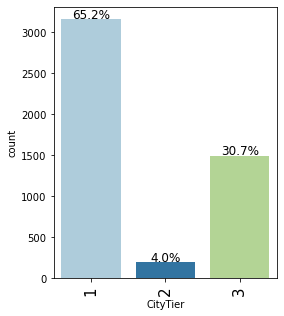

In [144]:
labeled_barplot(Travel_data, "CityTier", perc=True)

### Observation:
There are more customers from Tier 1 follow by Tier 3, further exploration can help us to know which of the tiers actually purchase the package most

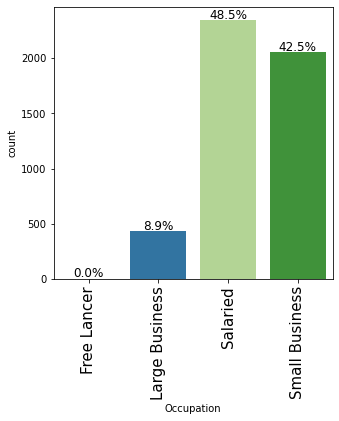

In [145]:
labeled_barplot(Travel_data, "Occupation", perc=True)

### Observation: 

Salaried customers have 48.5% followed by Small Business while Free Lancer had 0% but definitely Freelancer cannot be zero but relatively few and was rounded up to 0 by the computation. 

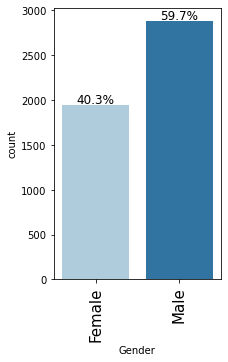

In [146]:
labeled_barplot(Travel_data, "Gender", perc=True)

### Observation: 
There are more Male enquiry customers (59.7%) but we cannot state whether we have more female that finally booked or male until we explore further

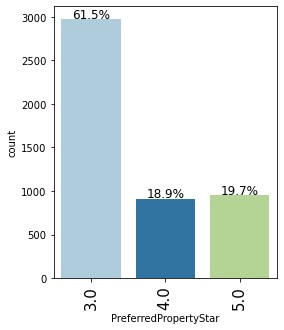

In [147]:
labeled_barplot(Travel_data, "PreferredPropertyStar", perc=True)

### Observation

Preferred Property Star of '3' has the highest percentage of 61.5% while '4' and '5' are close to each other 

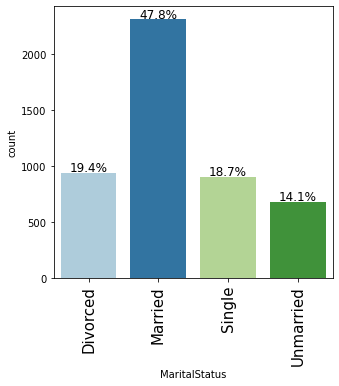

In [148]:
labeled_barplot(Travel_data, "MaritalStatus", perc=True)

### Observation 
There are more married customers of 47.8% followed by Divorced, etc, but we may not be able to ascertain yet if there are more Married men that purchase the vacation package 

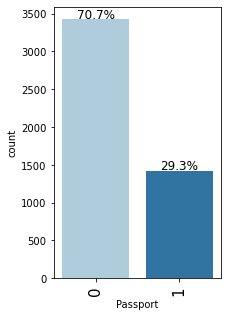

In [149]:
labeled_barplot(Travel_data, "Passport", perc=True)

### Observation :
There are only 29.3% of the enquiry customers that have passport, 70.7% do not have passport 

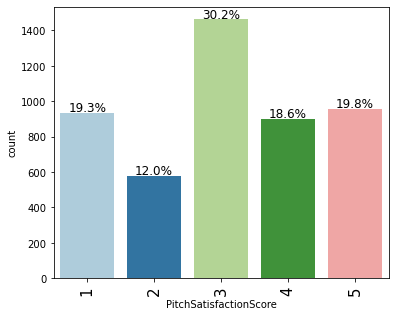

In [150]:
labeled_barplot(Travel_data, "PitchSatisfactionScore", perc=True)

### Observation 
The PitcSatisfaction score of '3' is the highest followed by 5, 1, 4, 2 respectively 

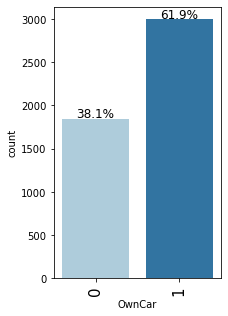

In [151]:
labeled_barplot(Travel_data, "OwnCar", perc=True)

### Observation
There are 61.9% of customers with a car and 38.1% without a car 

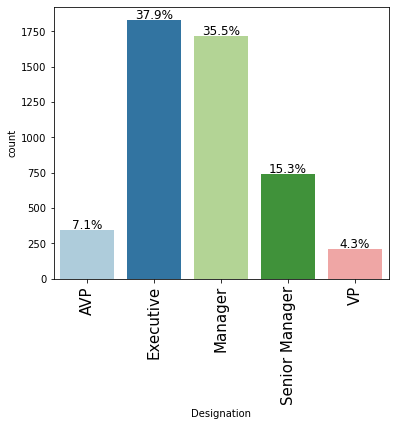

In [152]:
labeled_barplot(Travel_data, "Designation", perc=True)

### Observation
There are more Executive (37.9%) followed by Managers (35.5%), Senior Manager (15.3%) etc

# Bivariate Analysis Through Heatmap

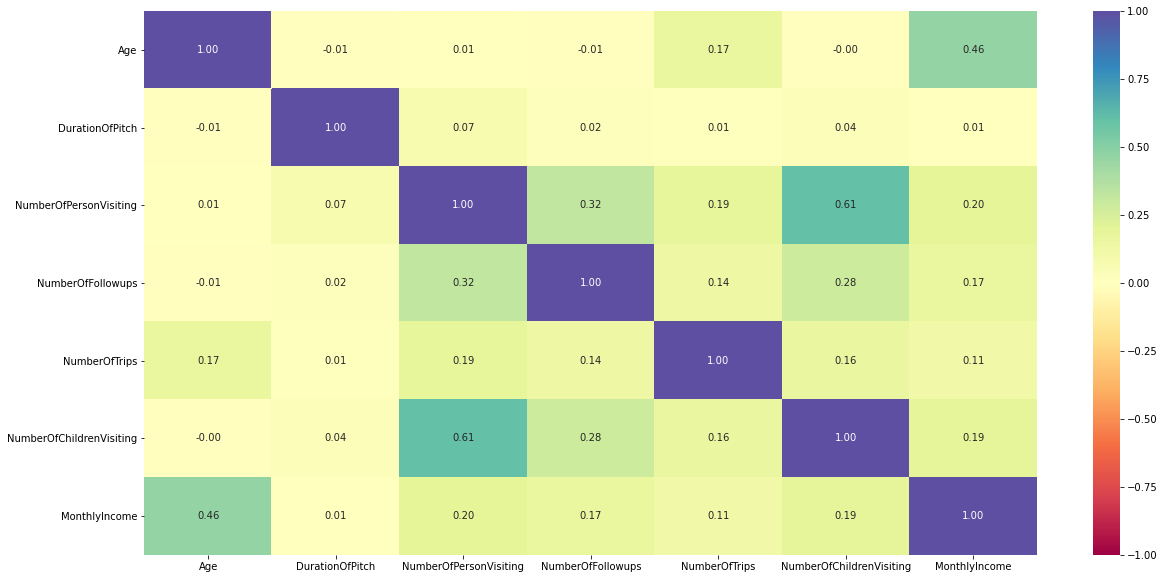

In [153]:
#Use heat map to know the correlation of the numerical features
plt.figure(figsize=(20,10))
sns.heatmap(Travel_data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

### Observation
Number of person Visiting  and the number of Children Visiting are a bit correlated and therefore one can be removed.

Monthly income  and Age also have some form of correlation but not so hign

In [154]:
#To understand the categorical variable 
Travel_data.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4837,2,0,3926
TypeofContact,4837,2,Self Enquiry,3422
CityTier,4837,3,1,3155
Occupation,4837,4,Salaried,2347
ProductPitched,4837,5,Basic,1831
PreferredPropertyStar,4837,3,3,2974
MaritalStatus,4837,4,Married,2311
Passport,4837,2,0,3422
PitchSatisfactionScore,4837,5,3,1462
OwnCar,4837,2,1,2995


### Observation:

ProdTaken is our target variable with about 81% of "No" in respect to customers that will not buy the package 

Majority of the enquiry customers make self enquiry but we are not yet sure if the self enquiry purchased most

Majority of the enquiry Customers are in CityTier 1 but we re not yet sure if the self enquiry purchased most

There are more Male than Female among the customers enquiry

Salaried enquiry customers are more in the occupation categories

Most preferred Customers enquiry wants "3" star

Majority of the enquiry customers do not have passport 

The highest pitchscore is '3'

Majority of the enquiry customers owns a car 

Executives are the Majority of the customers that enquires

# Bivariate Analysis using boxplot

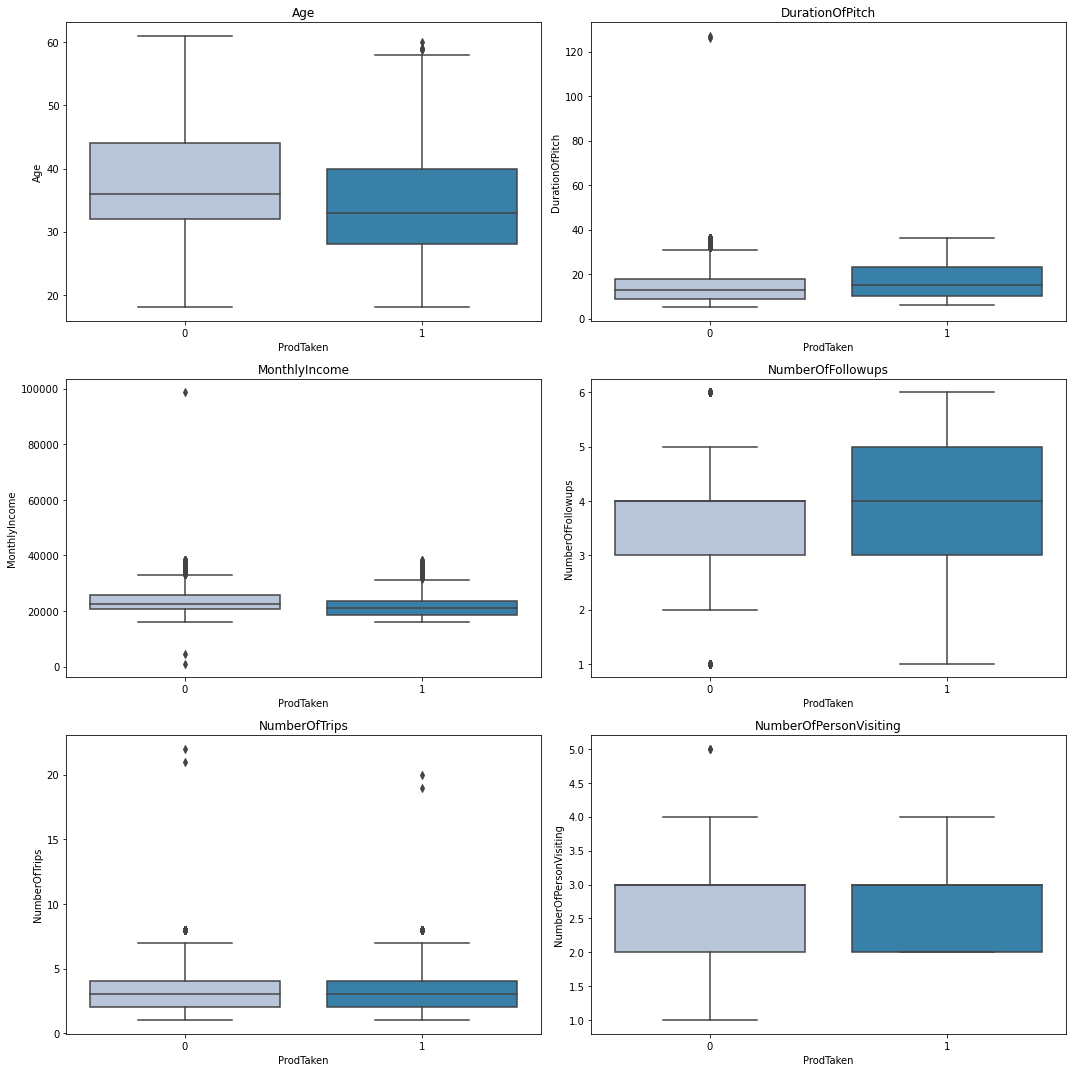

In [155]:
cols = Travel_data[['Age','DurationOfPitch','MonthlyIncome', 'NumberOfFollowups','NumberOfTrips', 'NumberOfPersonVisiting']].columns.tolist()
plt.figure(figsize=(15,15))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(Travel_data["ProdTaken"],Travel_data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

### Observations

Customers that are young adult, less than 40, are likely to purchase the package 

Customers that the sales representative spend a higher time of pitch with are likely to purchase the package 

Number of Person Visiting and Number of Trips does not seem to have much effect on Product taken by the Customers

The Monthly income earner that purchase the package are lumped around the same income earning range 

Customers with higher number of follow ups are likely to purchase the package 

# Bivariate Analysis for Categorical Variables using Stacked Bar Chart

In [156]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
All              3926  911  4837
Self Enquiry     2820  602  3422
Company Invited  1106  309  1415
------------------------------------------------------------------------------------------------------------------------


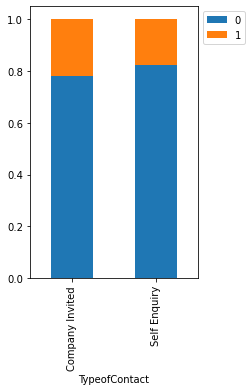

In [157]:
stacked_barplot(Travel_data, "TypeofContact", "ProdTaken")

### Observation
Those customers that are Company Invited are more likely to purchase the vacation package 

There is ~27% probability that a company invited customer will purchase the vacation package 

ProdTaken     0    1   All
CityTier                  
All        3926  911  4837
1          2640  515  3155
3          1137  350  1487
2           149   46   195
------------------------------------------------------------------------------------------------------------------------


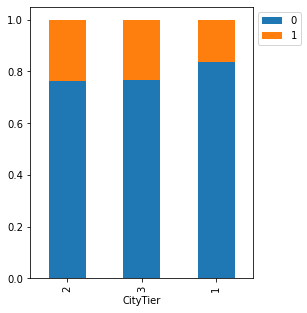

In [158]:
stacked_barplot(Travel_data, "CityTier", "ProdTaken")

### Observation
CityTier 2 & 3 have similar probability of purchase of the vacation package 

Tier 1 has the least even though it has the highest number of customers from our previous Univariate analysis


ProdTaken          0    1   All
Occupation                     
All             3926  911  4837
Salaried        1936  411  2347
Small Business  1678  378  2056
Large Business   312  120   432
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


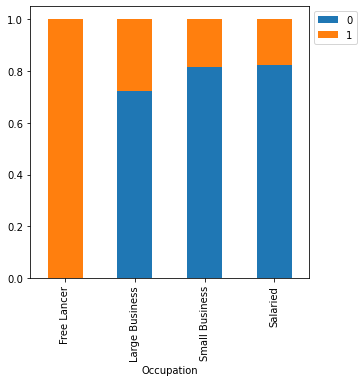

In [159]:
stacked_barplot(Travel_data, "Occupation", "ProdTaken")

### Observation 

100% of free Lancer who enquired actually purchased, even though they were just 2 customers

Large Business have the highest percentage following Free Lancer with about 38% who purchased among the customers. 

ProdTaken     0    1   All
Gender                    
All        3926  911  4837
Male       2315  572  2887
Female     1611  339  1950
------------------------------------------------------------------------------------------------------------------------


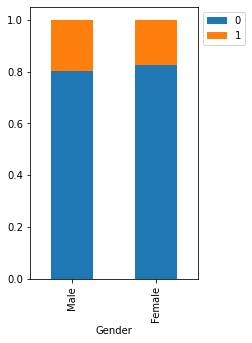

In [160]:
stacked_barplot(Travel_data, "Gender", "ProdTaken")

### Observation
Slightly there are more male than female that purchased the vacation package 

ProdTaken          0    1   All
ProductPitched                 
All             3926  911  4837
Basic           1282  549  1831
Deluxe          1513  203  1716
Standard         618  123   741
Super Deluxe     322   20   342
King             191   16   207
------------------------------------------------------------------------------------------------------------------------


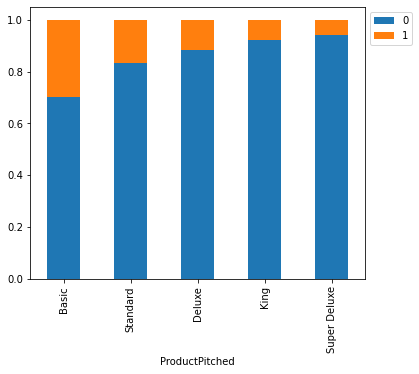

In [161]:
stacked_barplot(Travel_data, "ProductPitched", "ProdTaken")

### Observation
More customers purchased Basic, followed by Standard and this may just be attributed to the cost as Basic would seem more cheaper

ProdTaken         0    1   All
MaritalStatus                 
All            3926  911  4837
Married        1987  324  2311
Single          606  300   906
Unmarried       516  166   682
Divorced        817  121   938
------------------------------------------------------------------------------------------------------------------------


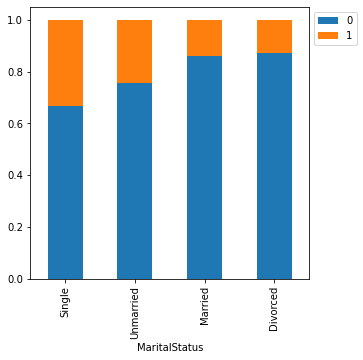

In [162]:
stacked_barplot(Travel_data, "MaritalStatus", "ProdTaken")

### Observation
More singles purchased the product, followed by Unmarried, this may be due to them not having so much restriction of Children and Spouses and can easily go on vacation without much planning.

Married and Divorced had almost the same percentage

ProdTaken     0    1   All
Passport                  
All        3926  911  4837
1           924  491  1415
0          3002  420  3422
------------------------------------------------------------------------------------------------------------------------


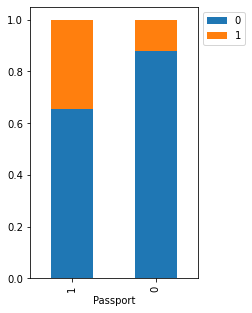

In [163]:
stacked_barplot(Travel_data, "Passport", "ProdTaken")

### Observation
More people with passport actually purchased the vacation package, even though earlier we understood that there are more people without passport that enquired. 

ProdTaken     0    1   All
OwnCar                    
All        3926  911  4837
1          2442  553  2995
0          1484  358  1842
------------------------------------------------------------------------------------------------------------------------


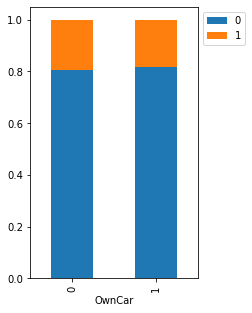

In [164]:
stacked_barplot(Travel_data, "OwnCar", "ProdTaken")

### Observation 
Customer with Car and without car does not really have much effect on the purchase of the vacation package

ProdTaken          0    1   All
Designation                    
All             3926  911  4837
Executive       1282  549  1831
Manager         1513  203  1716
Senior Manager   618  123   741
AVP              322   20   342
VP               191   16   207
------------------------------------------------------------------------------------------------------------------------


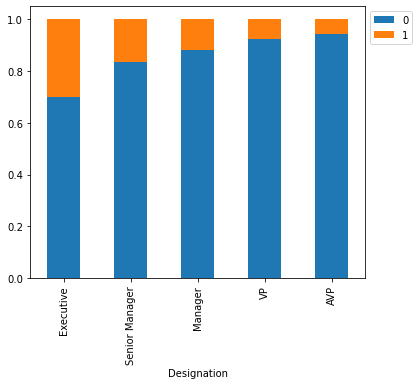

In [165]:
stacked_barplot(Travel_data, "Designation", "ProdTaken")

### Observation
More Executives, followed by Senior Managers and Managers purchased the package 

# Data Pre-Processing 

In [166]:
#Dropping the column where the column correlates 
Travel_data.drop(['NumberOfChildrenVisiting'], axis = 1, inplace=True)

#### Remove Outliers from the following features :DurationOfPitch, MonthlyIncome, NumberOfPersonVisiting, NumberOfTrips


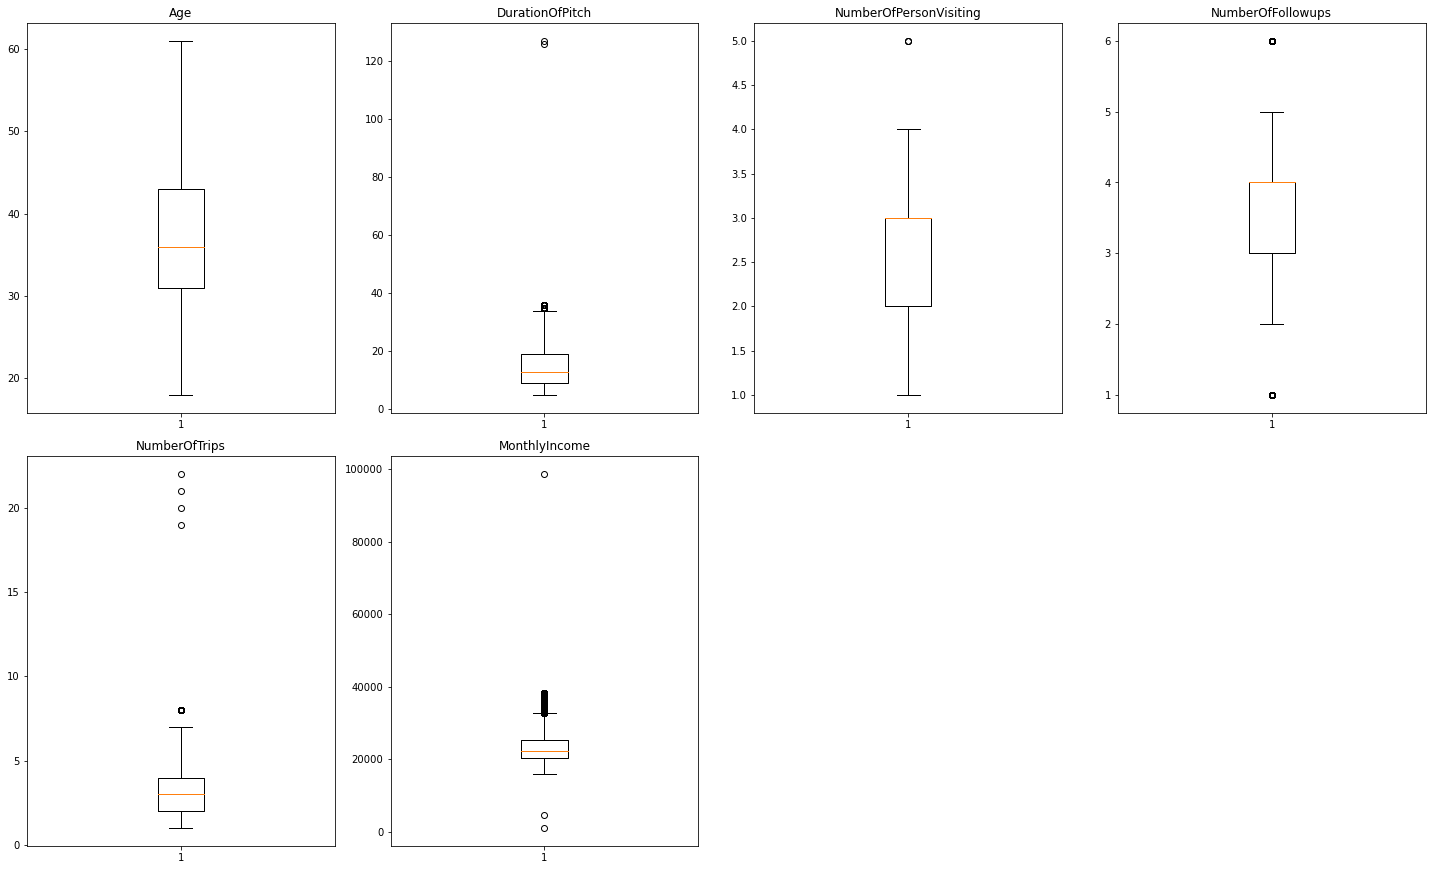

In [167]:
# Detect the outlier in the numerical variables using boxplot
numerical_col = Travel_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(Travel_data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [168]:
#Outlier functions 
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whisker will be assigned value of upper_Whisker 
    return data

def treat_outliers_all(data, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    data: data frame
    '''
    for c in col_list:
        data = treat_outliers(data,c)
        
    return data
    

In [169]:
#Remove the outliers in numerical features
numerical_col = Travel_data.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

Travel_data = treat_outliers_all(Travel_data,numerical_col)

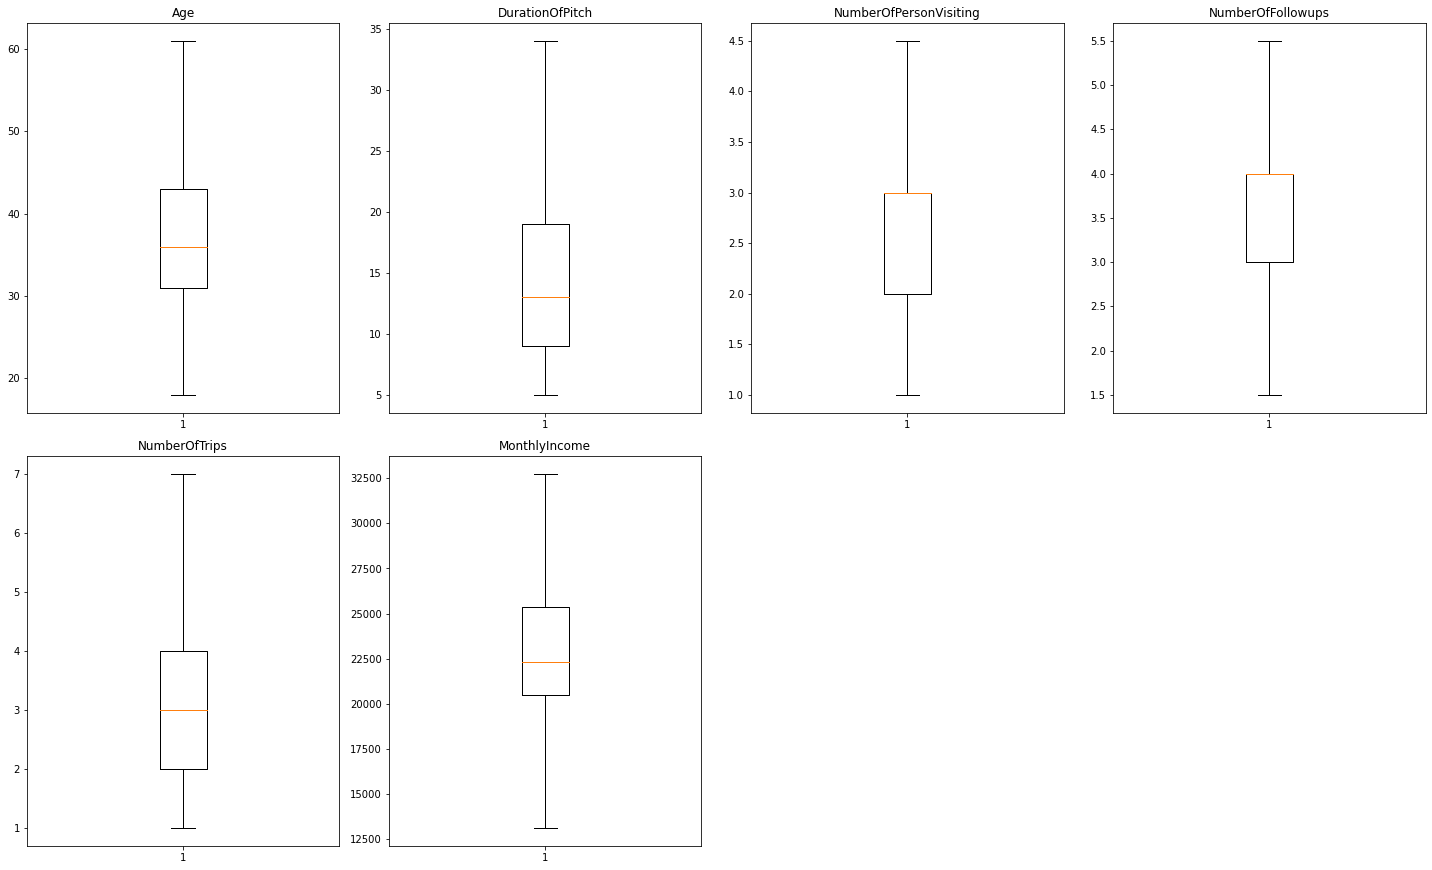

In [170]:
# Confirm the outliers have been removed
numerical_col = Travel_data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(Travel_data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

### Data Modelling 

### Encode the categorical variables using dummies and define the input and target variable

In [171]:
X = Travel_data.drop(['ProdTaken'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = Travel_data ['ProdTaken']

In [172]:
#Confirm the categorical variables have been replace with 0's and 1's 
X

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,MonthlyIncome,TypeofContact_Self Enquiry,CityTier_2,CityTier_3,Occupation_Large Business,...,Passport_1,PitchSatisfactionScore_2,PitchSatisfactionScore_3,PitchSatisfactionScore_4,PitchSatisfactionScore_5,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
CustomerID,,,,,,,,,,,,,,,,,,,,,
200000,41,6.0,3.0,3.0,1,20993.0,1,0,1,0,...,1,1,0,0,0,1,0,1,0,0
200001,49,14.0,3.0,4.0,2,20130.0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
200002,37,8.0,3.0,4.0,7,17090.0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
200003,33,9.0,2.0,3.0,2,17909.0,0,0,0,0,...,1,0,0,0,1,1,1,0,0,0
200004,36,8.0,2.0,3.0,1,18468.0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204883,49,9.0,3.0,5.0,2,26576.0,1,0,1,0,...,1,0,0,0,0,1,0,1,0,0
204884,28,31.0,4.0,5.0,3,21212.0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,0
204885,52,17.0,4.0,4.0,7,31820.0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [173]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3385, 32) (1452, 32)


In [174]:
y.value_counts(1)

0    0.81166
1    0.18834
Name: ProdTaken, dtype: float64

### Model Evaluation Criterion
1. Predicting that a customer will purchase and the customer do not purchase 

2. Predicting that a customer will not purchase and the customer purchased 

### Which Case is more important ?

#### Predicting a customer will purchase while in actual the person do not purchase is more important; 

(The reason why this is the main prediction is that, the company would have spent so much money marketing to those customers and this would still bring the company to its previous state whereby they would spend so much money on those who should not be targetted)

Therefore, the company would want Precison maximized, greater precision higher the chances of minimizing false positive (Predicting someone would purchase the package when in actual would not purchase).The focus should be on increasing precision or minimizing false positive. 

### Defining functions that would be used to compute the results, prior to modelling

In [175]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [176]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree Model

In [177]:
#we can pass a dictionary {0:0.18,1:0.81} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.18,1:0.81},random_state=1)

In [178]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.81}, random_state=1)

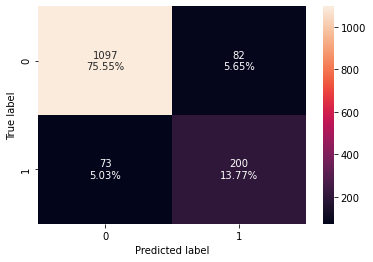

In [179]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [180]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [181]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.893251  0.732601    0.70922  0.720721


### Observation
Decision tree is working well on the training data but is not able to generalise well on the test data concerning the Precision

### Bagging Classifier Model

In [182]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

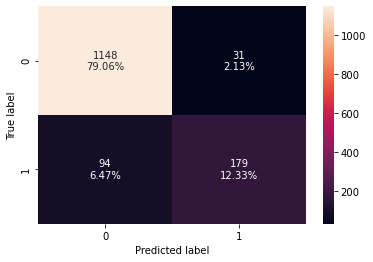

In [183]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [184]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.993205  0.968652   0.995169  0.981732


In [185]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.913912  0.655678   0.852381  0.741201


### Observation
Bagging Classifier shows a good model on the training data but is not able to generalise well on the test data but the performance on precision is still better

### Random Forest Model

In [186]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [187]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [188]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision      F1
0  0.919421  0.6337   0.910526  0.7473


### Observation
The Random Forest is giving a good accuracy and prediction and able to generalised well on test data in terms of precision 

# Tuning of Decision Tree, Random Forest and Bagging Classifier

### Tuned Decision Tree 

In [189]:
# Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.81},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.81}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.1,
                       random_state=1)

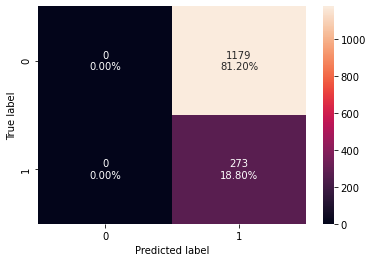

In [190]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [191]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.188479     1.0   0.188479  0.317176


In [192]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision        F1
0  0.188017     1.0   0.188017  0.316522


### Observation
Tuned Decision tree is not doing well on accuracy and precison in both the training and test data

### Tuned Bagging Classifier 

In [193]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0:0.18,1:0.81},random_state=1)
param_grid = {'base_estimator':[cl1],
              'n_estimators':[5,7,15,51,101],
              'max_features': [0.7,0.8,0.9,1]
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.18,
                                                                                 1: 0.81},
                                                                   random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [194]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.18,
                                                                      1: 0.81},
                                                        random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

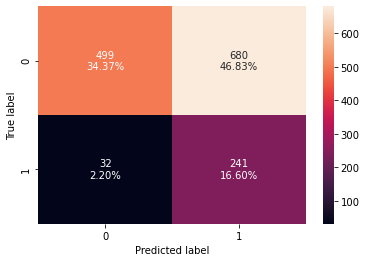

In [195]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [196]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy   Recall  Precision        F1
0  0.542688  0.88558   0.276961  0.421957


In [197]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.509642  0.882784   0.261672  0.403685


### Observation
The Tuned bagging estimator did not do well in accuracy and precsion in training and test data 

## Tunned Random Forest 

In [198]:
%%time
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

Wall time: 1h 39min


RandomForestClassifier(max_features=0.9, n_estimators=501, random_state=1)

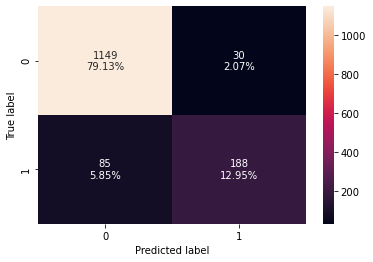

In [199]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [200]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


In [201]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test, y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.920799  0.688645   0.862385  0.765784


## Observation 
The Tunned Random forest perfomed a bit better in accuracy  and the recall is better than other tuned model too on both trainin and test data

# Boosting   Classifier Model      

### AdaBoost Model 

   Accuracy    Recall  Precision      F1
0  0.857016  0.358934   0.753289  0.4862
   Accuracy    Recall  Precision        F1
0  0.837466  0.351648   0.619355  0.448598


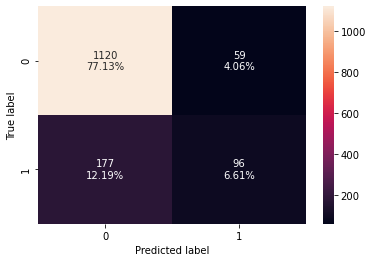

In [202]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

### Observation
Overfitting reduced with this model but the precision has reduced significantly 

# Gradient Boosting Model

Training performance:
    Accuracy    Recall  Precision     F1
0   0.89483  0.504702   0.889503  0.644
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.870523  0.461538   0.754491  0.572727


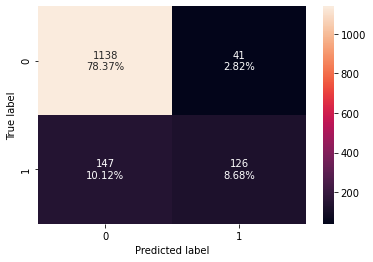

In [203]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

### Observation 
The model generalised well on the training and testing data but the precision is not so good even though is higher than the AdaBoost

# XGBoost Classifier Model


Training performance:
    Accuracy    Recall  Precision        F1
0  0.999705  0.998433        1.0  0.999216
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.926309  0.721612   0.864035  0.786427
Wall time: 1.65 s


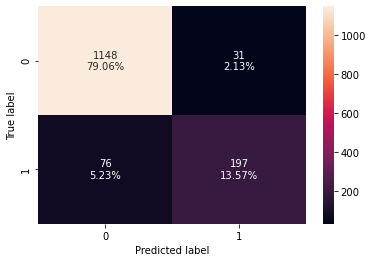

In [204]:
%%time
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [205]:
%%time
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

Wall time: 3h 18min 40s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='logloss', gamma=3,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [216]:
xgbtunned_classifier_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgbtunned_classifier_model_train_perf)
xgbtunned_classifier_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgbtunned_classifier_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.967208  0.987461   0.859482  0.919037
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.883609  0.765568   0.665605  0.712095


### Observation 
The model is not good as it overfits but gave a significant accuracy and precision in both training and testing data than all other boosting model earlier considered.

### Stacking Model

In [206]:
#Using Random Forest, Gradient Boosting, Decision Tree as first set of model and XGboost as final 
estimators = [('Random Forest',rf), ('Gradient Boosting',gb_classifier), ('Decision Tree',dtree )]

final_estimator = xgb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.81},
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree',
                                                 colsample_bylevel=1,
                                                 colsample_bynode=1,
                                                 colsample_by...
                                                 importance_type=None,
                                                 interaction_

Training performance:
    Accuracy  Recall  Precision       F1
0  0.998227     1.0   0.990683  0.99532
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.927686  0.798535   0.813433  0.805915


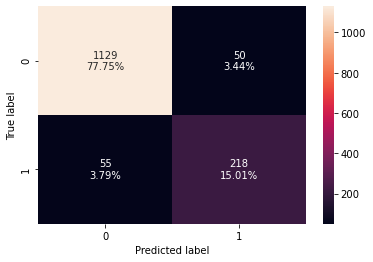

In [207]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

## Observation 
The Model accuracy was good but the precsion on test data was not too good 

# Tunning Boosting Models 

### Tunned Adaboost 

In [208]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.6, n_estimators=100, random_state=1)

   Accuracy   Recall  Precision        F1
0  0.974889  0.89185    0.97265  0.930499
   Accuracy    Recall  Precision       F1
0  0.889807  0.589744   0.770335  0.66805


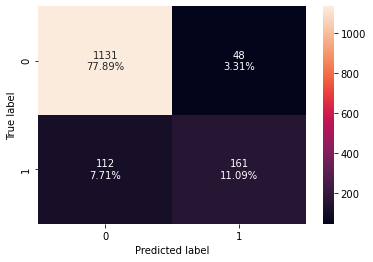

In [209]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

### Observation
Tunned AdaBoost is did better than the normal adaBoost in Accuracy and Precision, even though the scores are not so acceptable

### Tunned Gradient Boosting

In [210]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.928213  0.658307    0.94382  0.775623
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.874656  0.509158   0.743316  0.604348


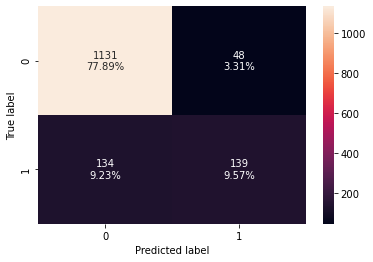

In [211]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

### Observation 
The Tunned Gradient Boosting only has slight improvement from the normal gradient boosting 


In [212]:
models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,dtree_estimator_model_train_perf.T, bagging_model_train_perf.T,bagging_estimator_model_train_perf.T, rf_model_train_perf.T,rf_estimator_model_train_perf.T, 
    ab_classifier_model_train_perf.T,abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T, gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,stacking_classifier_model_train_perf.T ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier"]
print("Test performance comparison:")
models_train_comp_df

Test performance comparison:


,Decision Tree,Decision Tree Estimator,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,1.0,0.188479,0.993205,0.542688,1.0,1.0,0.857016,0.974889,0.894830,0.928213,0.999705,0.998227
Recall,1.0,1.000000,0.968652,0.885580,1.0,1.0,0.358934,0.891850,0.504702,0.658307,0.998433,1.000000
Precision,1.0,0.188479,0.995169,0.276961,1.0,1.0,0.753289,0.972650,0.889503,0.943820,1.000000,0.990683
F1,1.0,0.317176,0.981732,0.421957,1.0,1.0,0.486200,0.930499,0.644000,0.775623,0.999216,0.995320


In [213]:
models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,dtree_estimator_model_test_perf.T, bagging_model_test_perf.T,bagging_estimator_model_test_perf.T, rf_model_test_perf.T,rf_estimator_model_test_perf.T, 
    ab_classifier_model_test_perf.T,abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T, gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,stacking_classifier_model_test_perf.T ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Decision Tree Estimator,Bagging Classifier,Bagging Estimator Tuned,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,0.893251,0.188017,0.913912,0.509642,0.919421,0.920799,0.837466,0.889807,0.870523,0.874656,0.926309,0.927686
Recall,0.732601,1.000000,0.655678,0.882784,0.633700,0.688645,0.351648,0.589744,0.461538,0.509158,0.721612,0.798535
Precision,0.709220,0.188017,0.852381,0.261672,0.910526,0.862385,0.619355,0.770335,0.754491,0.743316,0.864035,0.813433
F1,0.720721,0.316522,0.741201,0.403685,0.747300,0.765784,0.448598,0.668050,0.572727,0.604348,0.786427,0.805915


### Observation
Random Forest performs well in accuracy and precsion for both the training and testing data

Decision tree estimator(Tuned) generalised well in both training and testing data even though it did not performed well

Bagging Classifier (Tunned) generalised weill in both the training and testing data but the performance was not so good 

### Feature Importance 

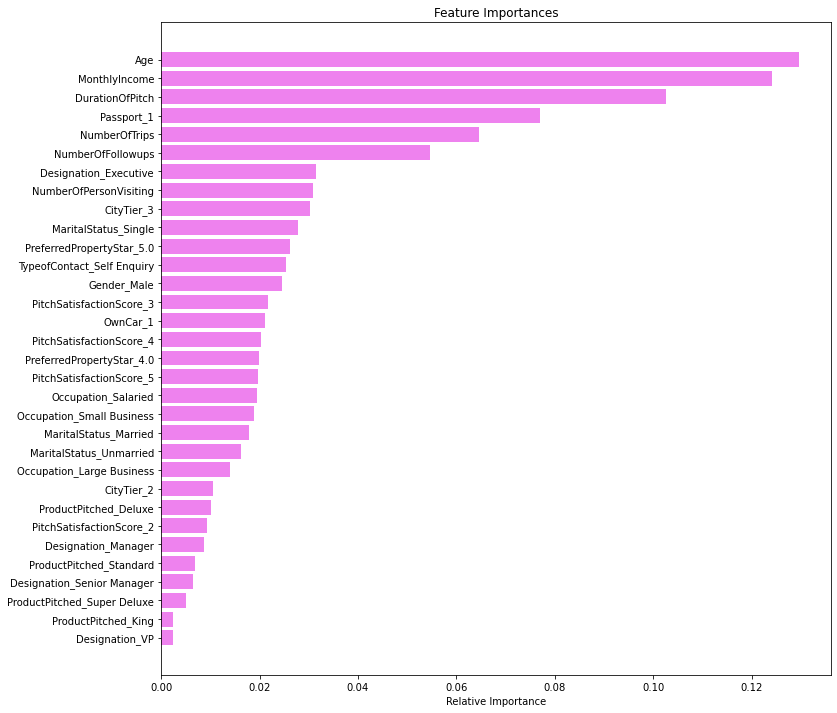

In [214]:
#Estimate using the Random Forest 
feature_names = X_train.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Observation
Age, is the most important feature for prediction followed by Monthly income, Duration of Pitch, Passport, Number of Trips, and Number of follow ups

# Business Insight and Recommendations 

* A predictive model has been built:

  a) Which the company can deploy to identify customers who are more likely to purchase the new vacation package 

  b) Which the company can use to find the drivers of decisions in purchasing the vacation package. 
    
  c) Upon which the company can take appropriate decision to build better target marketing process that would ensure apporpriate customers are targetted.


* Factors that drives the decisions of customers towards purchasing vacation package are : Age, Monthy Income, Duration of Pitch, Passport, Number of Trips & Number of Follow up


* Age : Young Adults around the age 25-40 years are the one that purchase vacation package more, this is logical as a lot of young adult want to explore and among them are several that are not married too with less load and expenses - The package being developed should consider the interest of the younger customers, the company can get information or survey to ensure they include the interest of the younger customers in the new package 


* Monthly Income: Customers in certain salary level (20,000 - 25,000) are the one that purchase the package most - The company should identify this people in this salary range and make provisions for them that can help to  key into the package, for instance they may want installmental payment considering other financial engagement they may have.


* Duration of Pitch : Customers with higher duration of pitch purchase most, this is logical as this is one tool in marketing that could be harnessed - The company should employ or engage more marketers and eastablish a minimum pitch duration which would ensure purchase.


* Passport : Customers with passport purchse the vacation package more, this is logical as people that go ahead to take their passports are more inclined to travel - The company can add passport processing as part of the package for those that do not have. 


* Number of Trips : The average number of trips is around 3 - The package should be developed to ensure the trip duration aligns with the most popular demand to ensure more customers would purchase it. 


* Number of Follow Ups : The higher the follow ups the higher the propability that a customer would purchase the package - The Company should improve on the follow up strategy and define the minimum most viable follow up that would give optimal value. 
